In [1]:
from models_and_procedures_definitions import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create a grid of points in the domain [0, 1]^2
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1, x2)

# Compute the function values at the grid points
Z = f(X1, X2)

# Plot the target function using imshow
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar(label='$f(x)$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$f(x) = sin(4 \pi x_1) \cdot sin(4 \pi x_2)$')
plt.savefig('target_function.png', dpi=300, bbox_inches='tight')
plt.close()
#plt.show()

Training Wide ReLU ANN...
Training Deep ReLU ANN...
Training Spline ANN (z=20)...
Training ABEL-Spline (z=20)...
Training Lookup Table (z=20)...
Predicting with Wide ReLU ANN...
313/313 [==============================] - 0s 845us/step
Predicting with Deep ReLU ANN...
313/313 [==============================] - 0s 856us/step
Predicting with Spline ANN (z=20)...
313/313 [==============================] - 0s 635us/step
Predicting with ABEL-Spline (z=20)...
313/313 [==============================] - 0s 718us/step
Predicting with Lookup Table (z=20)...
313/313 [==============================] - 0s 720us/step


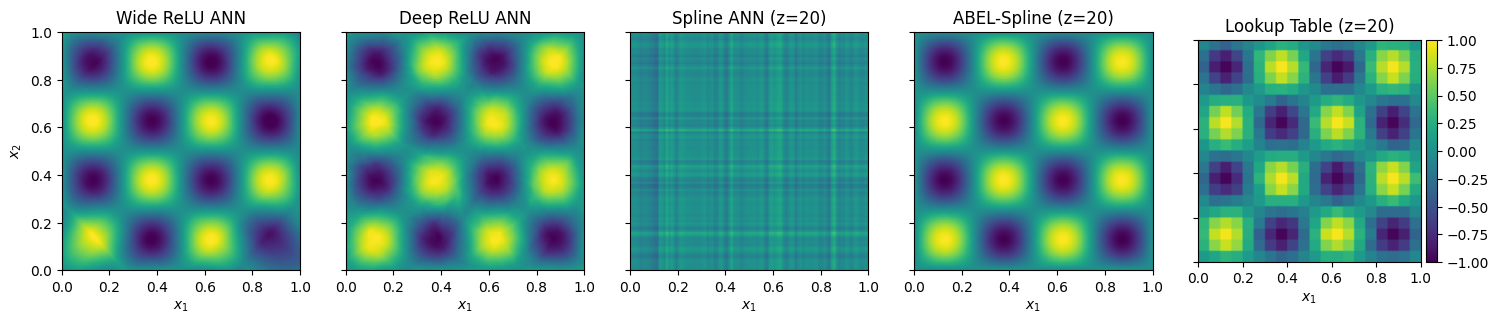

In [2]:
models = initialize_all_models(input_dimension=2, seed_val=1)
compile_models(models)

# Generate the training data
X_train = np.random.uniform(0, 1, (16000, 2))
y_train = f(X_train[:, 0], X_train[:, 1])


# Initialize list to store history of losses for each model
histories = []

# Fit each model to the training data
for model, name in models:
    print(f"Training {name}...")
    history = model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=0)
    histories.append(history)
    
predictions = predict_models(models)
plot_predictions(models, predictions, plot_name='predictions', save=False)
plot_predictions(models, predictions, plot_name='predictions', save=True)

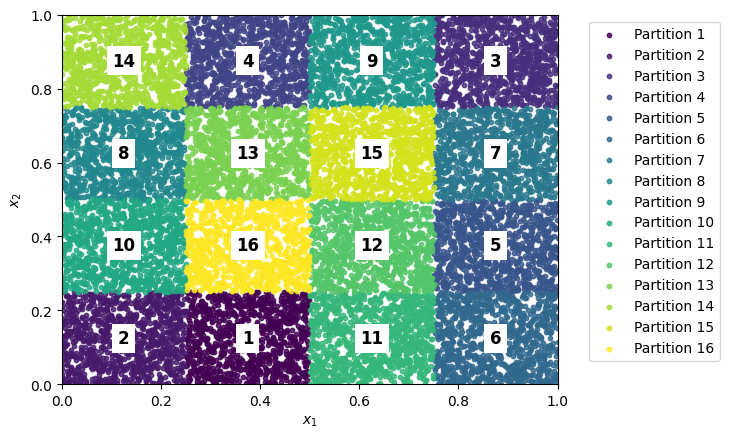

In [3]:
# Define the number of partitions per dimension
n_partitions = 4

# Number of samples per partition
n_samples = 1000

partitions=create_partitions(n_partitions)
X,y=generate_training_data(partitions,n_samples)
plot_training_data(partitions,X,y,n_samples, plot_name='partitions', save=False)
plot_training_data(partitions,X,y,n_samples, plot_name='partitions', save=True)


partition_input_training = np.split(X,16)
partition_target_training = np.split(y,16)

Partition index is 0
Partition index is 1
Partition index is 2
Partition index is 3
Partition index is 4
Partition index is 5
Partition index is 6
Partition index is 7
Partition index is 8
Partition index is 9
Partition index is 10
Partition index is 11
Partition index is 12
Partition index is 13
Partition index is 14
Partition index is 15
Predicting with Wide ReLU ANN...
313/313 [==============================] - 0s 924us/step
Predicting with Deep ReLU ANN...
313/313 [==============================] - 0s 699us/step
Predicting with Spline ANN (z=20)...
313/313 [==============================] - 0s 624us/step
Predicting with ABEL-Spline (z=20)...
313/313 [==============================] - 0s 751us/step
Predicting with Lookup Table (z=20)...
313/313 [==============================] - 0s 1ms/step


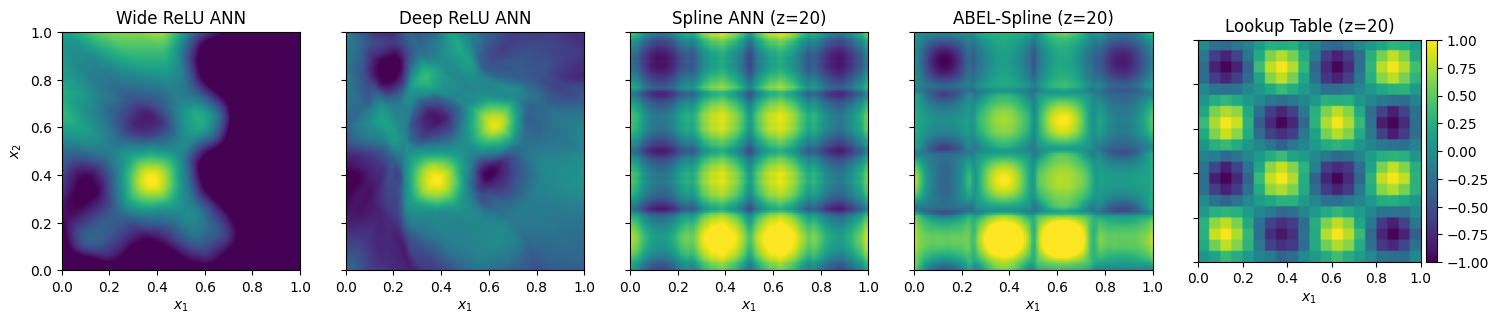

In [4]:
models = initialize_all_models(input_dimension=2, seed_val=1)
compile_models(models)

for partition_index in range(16):
    print(F"Partition index is {partition_index}")
    X_train = partition_input_training[partition_index]
    y_train = partition_target_training[partition_index]
    # Initialize list to store history of losses for each model
    histories_sequential = []

    # Fit each model to the training data
    for model, name in models:
        #print(f"Training {name}...")
        history = model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=0)
        histories_sequential.append(history)
        
    # can also plot the outputs after training on each subset
    #predictions = predict_models(models)
    #plot_predictions(models, predictions, plot_name='predictions', save=False)

predictions = predict_models(models)
plot_predictions(models, predictions, plot_name='sequential_continual_learning', save=False)
plot_predictions(models, predictions, plot_name='sequential_continual_learning', save=True)



Partition index is 0
Partition index is 1
Partition index is 2
Partition index is 3
Partition index is 4
Partition index is 5
Partition index is 6
Partition index is 7
Partition index is 8
Partition index is 9
Partition index is 10
Partition index is 11
Partition index is 12
Partition index is 13
Partition index is 14
Partition index is 15
Predicting with Wide ReLU ANN...
313/313 [==============================] - 0s 919us/step
Predicting with Deep ReLU ANN...
313/313 [==============================] - 0s 606us/step
Predicting with Spline ANN (z=20)...
313/313 [==============================] - 0s 621us/step
Predicting with ABEL-Spline (z=20)...
313/313 [==============================] - 0s 776us/step
Predicting with Lookup Table (z=20)...
313/313 [==============================] - 0s 682us/step


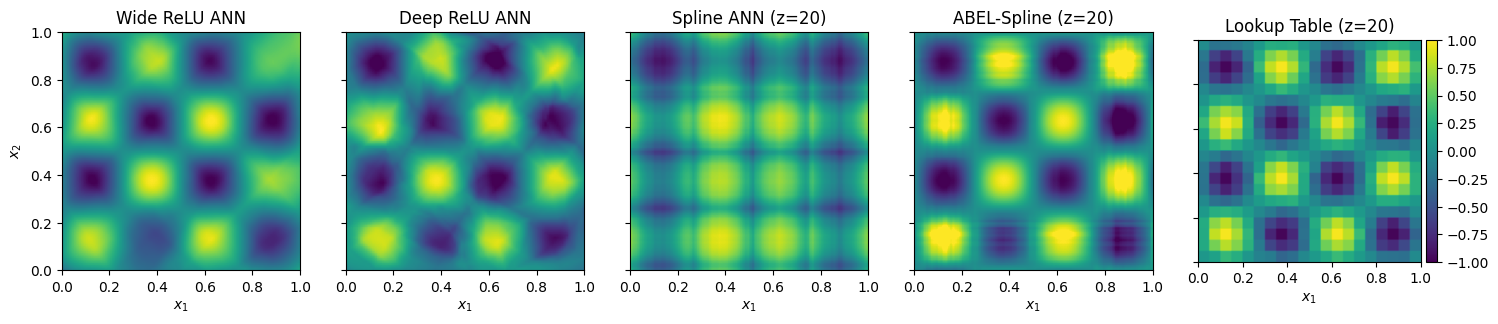

In [6]:
models = initialize_all_models(input_dimension=2, seed_val=2)
compile_models(models)

num_pseudorehearsal_samples = 1000

for partition_index in range(16):
    print(F"Partition index is {partition_index}")
    X_train = partition_input_training[partition_index]
    y_train = np.reshape(partition_target_training[partition_index],(n_samples,1))
    # Initialize list to store history of losses for each model
    histories_sequential = []

    # Fit each model to the training data
    for model, name in models:
        # Generate pseudorehearsal samples and combine them with the current training data
        X_train_augmented, y_train_augmented = pseudorehearsal(2, num_pseudorehearsal_samples,
                                                                model,
                                                                X_train,
                                                                y_train,
                                                                seed_val=0)
        #print(f"Training {name}...")
        history = model.fit(X_train_augmented, 
                            y_train_augmented, 
                            epochs=100, 
                            batch_size=100, 
                            verbose=0)
        histories_sequential.append(history)
        
    # can also plot the outputs after training on each subset
    #predictions = predict_models(models)
    #plot_predictions(models, predictions, plot_name='predictions', save=False)

predictions = predict_models(models)
plot_predictions(models, predictions, plot_name='pseudo_rehearsal_continual_learning', save=False)
plot_predictions(models, predictions, plot_name='pseudo_rehearsal_continual_learning', save=True)
